In [72]:
!pwd

/global/cfs/cdirs/atlas/xju/share/Tutorials


## Setup python Environment

1) create an isolated python environment namely `tutorial` via [conda](https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#creating-an-environment-with-commands). 

\[Optional\] Create a configuration file for `conda`: `~/.condarc`, 
and specify the location of envrionments that will house python modules. 
This directory will grow very quickly. I suggest to use a project directory.
```json
envs_dirs:
  - /global/cfs/cdirs/atlas/xju/conda/envs
report_errors: true
```

1.1) Following commands is to install an environment named `tutorial`. 
```bash
module load python
conda create -n tutorial python=3.8 ipykernel
source $(which conda | sed -e s#bin/conda#bin/activate#)  tutorial
python -m ipykernel install --user --name tutorial --display-name a-Tutorial
```

It will install a kernel file at `~/.local/share/jupyter/kernels/tutorial/kernel.json`. 

1.2) create a `~/.local/share/jupyter/kernels/tutorial/setup.sh` with the following contents:
```bash
#!/bin/bash
module load python
source $(which conda | sed -e s#bin/conda#bin/activate#)  tutorial
python -m ipykernel_launcher $@
```
and make it executable `chmod +x ~/.local/share/jupyter/kernels/tutorial/setup.sh`.

Get absolute path: `readlink -f ~/.local/share/jupyter/kernels/tutorial/setup.sh`.

1.3) update the `~/.local/share/jupyter/kernels/tutorial/kernel.json` as the following. 
Note that the path to `setup.sh` should be the absolute path.
```json
{
 "argv": [
  "/global/u1/x/xju/.local/share/jupyter/kernels/tutorial/setup.sh",
  "-f",
  "{connection_file}"
 ],
 "display_name": "a-Tutorial",
 "language": "python"
}
```

In [1]:
!which python

/global/homes/x/xju/.conda/envs/tutorial/bin/python


In [2]:
!which pip

/global/homes/x/xju/.conda/envs/tutorial/bin/pip


In [3]:
!pip install tensorflow

Install the python package [root_gnn](https://github.com/xju2/root_gnn/tree/tf2) using the branch `tf2` therein. 

In [21]:
!pip install git+https://github.com/xju2/root_gnn.git@v0.8.0

  Cloning https://github.com/xju2/root_gnn.git (to revision tf2) to /tmp/pip-req-build-lgd39_97
  Using cached tables-3.6.1-cp38-cp38-manylinux1_x86_64.whl (4.3 MB)
     |████████████████████████████████| 472 kB 26.4 MB/s eta 0:00:01
     |████████████████████████████████| 72 kB 527 kB/s  eta 0:00:01


```
├── root_gnn
│   ├── configs/
│   ├── __init__.py
│   ├── losses.py
│   ├── model.py
│   ├── optimizers.py
│   ├── prepare.py
│   ├── prepare_test.py
│   ├── scripts
│   │   ├── calculate_herwig_metrics
│   │   ├── calculate_metrics
│   │   ├── calculate_topreco_metrics
│   │   ├── calculate_wtagger_metrics
│   │   ├── create_tfrecord
│   │   ├── evaluate_global_classifier
│   │   ├── evaluate_herwig_hadron
│   │   ├── evaluate_top_reco
│   │   ├── evaluate_w_qcd_classifier
│   │   ├── evaluate_wtagger
│   │   ├── preprocess_hadrons.py
│   │   ├── split_files_for_nn
│   │   ├── train_classifier
│   │   ├── train_decay_simulator
│   │   ├── train_decay_simulator_regression
│   │   ├── train_HI.py
│   │   ├── train_top_reco.py
│   │   └── view_training_log
│   ├── src
│   │   ├── datasets
│   │   │   ├── __init__.py
│   │   │   ├── base.py
│   │   │   ├── fourtop.py
│   │   │   ├── graph.py
│   │   │   ├── graph_test.py
│   │   │   ├── hadronic.py
│   │   │   ├── herwig_hadrons.py
│   │   │   ├── herwig_hadrons_v2.py
│   │   │   ├── hyy_gen.py
│   │   │   ├── toppair.py
│   │   │   ├── topreco.py
│   │   │   ├── toptagger.py
│   │   │   ├── wprimefiltered.py
│   │   │   ├── wprimeljet.py
│   │   │   └── wprime.py
│   │   ├── __init__.py
│   │   ├── losses
│   │   ├── models
│   │       ├── __init__.py
│   │       ├── base.py
│   │       ├── decay_simulator.py
│   │       ├── edge_classifier.py
│   │       ├── edge_global_classifier.py
│   │       ├── general_classifier.py
│   │       ├── global_classifier.py
│   │       ├── gnn_gan.py
│   │       ├── model_utils.py
│   │       ├── node_edge_classifier.py
│   │       ├── node_predictor.py
│   ├── trainer.py
│   ├── utils_plot.py
│   └── utils.py
├── run.sh
├── setup.py
└── submit.sh
```

Procedures of training a GNN for event classification -- top quark tagger.

1. Creating training graphs

```bash
create_tfrecord /global/homes/x/xju/atlas/data/top-tagger/train.h5 tfrec/train \
  --evts-per-record 100 --max-evts 1000 \
  --type TopTaggerDataset --num-workers 2
```


2. Creating validating graphs

```bash
create_tfrecord /global/homes/x/xju/atlas/data/top-tagger/val.h5 tfrec/val \
  --evts-per-record 100 --max-evts 1000 \
  --type TopTaggerDataset --num-workers 2
```


3. Creating testing graphs

```bash
create_tfrecord /global/homes/x/xju/atlas/data/top-tagger/test.h5 tfrec/test \
  --evts-per-record 100 --max-evts 1000 \
  --type TopTaggerDataset --num-workers 2
```


4. Training GNN

```bash
train_classifier config.yaml
```


5. Evaluating Outputs of GNN

```bash
evaluate_global_classifier config.yaml "tfrec/test_*.tfrec" test0
```


6. Calcuating output metrics

```bash
calculate_metrics test0.npz test0
```

### Creating graphs using networkx

[networkx](https://networkx.org/documentation/stable/tutorial.html) is a Python package for the study of graphs.


In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx

from graph_nets import utils_np
from graph_nets import utils_tf
from graph_nets import graphs

In [6]:
g = nx.DiGraph()

# add nodes
[g.add_node(idx, features=np.array([1.*idx])) for idx in range(4)];

# add edges
edge_lists = [(0, 1), (1, 2), (2, 3), (3, 0)]
[g.add_edge(i, j, features=np.array([abs(i-j)])) for i,j in edge_lists];

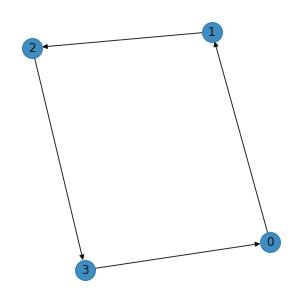

In [7]:
plt.figure(figsize=(4, 4))
pos = nx.spring_layout(g)
nx.draw(g, pos, node_size=400, alpha=0.85, node_color="#1f78b4", with_labels=True)

obtain the adjacency matrix

In [8]:
adj = np.asarray(nx.to_numpy_matrix(g))
adj

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [9]:
g.edges()

OutEdgeView([(0, 1), (1, 2), (2, 3), (3, 0)])

In [10]:
g_tuple = utils_np.networkxs_to_graphs_tuple([g])

In [11]:
g_tuple

GraphsTuple(nodes=array([[0.],
       [1.],
       [2.],
       [3.]]), edges=array([[1],
       [1],
       [1],
       [3]]), receivers=array([1, 2, 3, 0], dtype=int32), senders=array([0, 1, 2, 3], dtype=int32), globals=None, n_node=array([4], dtype=int32), n_edge=array([4], dtype=int32))

In [45]:
def print_graphs_tuple(g, data=True):
    for field_name in graphs.ALL_FIELDS:
        per_replica_sample = getattr(g, field_name)
        if per_replica_sample is None:
            print(field_name, "EMPTY")
        else:
            print(field_name, "is with shape", per_replica_sample.shape)
            if data and  field_name != "edges":
                print(per_replica_sample)

In [44]:
print_graphs_tuple(g_tuple)

nodes is with shape (4, 1)
[[0.]
 [1.]
 [2.]
 [3.]]
edges is with shape (4, 1)
receivers is with shape (4,)
[1 2 3 0]
senders is with shape (4,)
[0 1 2 3]
globals EMPTY
n_node is with shape (1,)
[4]
n_edge is with shape (1,)
[4]


### Create GraphsTuple using data-dict \[recommend\]

In [14]:
n_node = 4
n_node_features = 1
n_edge = 4
n_edge_features = 1
nodes = np.random.rand(n_node, n_node_features).astype(np.float32)
edges = np.random.rand(n_edge, n_edge_features).astype(np.float32)
receivers = np.array([1, 2, 3, 0])
senders = np.array([0, 1, 2, 3])
datadict = {
    "n_node": n_node,
    "n_edge": n_edge,
    "nodes": nodes,
    "edges": edges,
    "senders": senders,
    "receivers": receivers,
    "globals": np.array([0], dtype=np.float32)
}

In [15]:
g_tuple2 = utils_tf.data_dicts_to_graphs_tuple([datadict])

In [16]:
print_graphs_tuple(g_tuple2)

nodes tf.Tensor(
[[0.8741005 ]
 [0.13004869]
 [0.81853694]
 [0.30023816]], shape=(4, 1), dtype=float32)
edges tf.Tensor(
[[0.06013998]
 [0.5929212 ]
 [0.90707844]
 [0.39467514]], shape=(4, 1), dtype=float32)
receivers tf.Tensor([1 2 3 0], shape=(4,), dtype=int32)
senders tf.Tensor([0 1 2 3], shape=(4,), dtype=int32)
globals tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
n_node tf.Tensor([4], shape=(1,), dtype=int32)
n_edge tf.Tensor([4], shape=(1,), dtype=int32)


### Can you finish implementing the following function?

In [17]:
def fully_connected_edges(n_nodes: int):
    """For a given number of nodes, 
    return the senders and receivers for a fully-connected graph.
    """
    
    receivers = senders = n_edge = None
    
    return {"receivers": receivers, "senders": senders, "n_edge": n_edge}

### Convert an event to a fully-connected graph

In [19]:
filename = '/global/homes/x/xju/atlas/data/top-tagger/test.h5'

In [22]:
with pd.HDFStore(filename, mode='r') as store:
    df = store['table']

In [23]:
df.head()

,E_0,PX_0,PY_0,PZ_0,E_1,PX_1,PY_1,PZ_1,E_2,PX_2,...,E_199,PX_199,PY_199,PZ_199,truthE,truthPX,truthPY,truthPZ,ttv,is_signal_new
436,218.364243,-172.341858,110.129105,-76.503624,153.661118,-111.320465,93.167969,-50.390713,76.708054,-56.523701,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
440,122.238762,26.738468,-91.613998,76.382225,121.227135,17.644758,-93.015450,75.715302,90.420105,21.377417,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
441,383.772308,-97.906456,79.640709,-362.426361,200.625992,-54.921326,37.994343,-189.184753,123.247223,-33.828953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
444,132.492752,-77.763947,-87.322601,-62.304600,83.946594,-49.450481,-53.823605,-41.288010,28.072624,-19.964916,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
445,730.786987,-209.120010,-193.454315,-672.973877,225.477325,-75.363350,-66.226990,-201.926651,217.040192,-63.698189,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


In [27]:
df[df['is_signal_new'] == 1].head()

,E_0,PX_0,PY_0,PZ_0,E_1,PX_1,PY_1,PZ_1,E_2,PX_2,...,E_199,PX_199,PY_199,PZ_199,truthE,truthPX,truthPY,truthPZ,ttv,is_signal_new
275,65.646370,-58.526817,29.698223,-1.439855,64.047226,-36.257854,46.957092,24.133938,46.889977,-26.141216,...,0.0,0.0,0.0,0.0,609.978516,-425.223938,360.547333,179.307800,1,1
278,182.433838,-67.388512,-150.770279,77.519150,105.039909,-24.843391,-70.149010,74.130325,99.697556,-25.996574,...,0.0,0.0,0.0,0.0,761.416626,-368.340454,-444.232635,466.554565,1,1
285,218.015808,-142.368179,19.166389,-163.996475,151.196808,-75.772964,7.036884,-130.649979,64.975327,-49.838360,...,0.0,0.0,0.0,0.0,1055.739014,-647.505615,54.828110,-814.257935,1,1
302,116.801796,90.702217,-54.621929,49.317455,87.957840,44.834236,-44.274315,61.369846,66.443222,31.902834,...,0.0,0.0,0.0,0.0,669.998962,439.078888,-269.705780,392.723145,1,1
308,114.989540,-70.048080,-66.881485,-61.989738,74.398933,-57.145046,-44.540745,-16.904631,48.529976,-37.200237,...,0.0,0.0,0.0,0.0,803.532227,-520.018433,-429.099030,-403.125366,1,1


In [29]:
event = df.iloc[0]
event

E_0              218.364243
PX_0            -172.341858
PY_0             110.129105
PZ_0             -76.503624
E_1              153.661118
                    ...    
truthPX            0.000000
truthPY            0.000000
truthPZ            0.000000
ttv                1.000000
is_signal_new      0.000000
Name: 436, Length: 806, dtype: float64

In [34]:
import itertools
from typing import Optional

features = ['E', 'PX', 'PY', 'PZ']
scale = 0.001
solution = 'is_signal_new'

def make_graph(event, debug: Optional[bool] = False):
    n_max_nodes = 200
    n_nodes = 0
    nodes = []
    for inode in range(n_max_nodes):
        E_name = 'E_{}'.format(inode)
        if event[E_name] < 0.1:
            continue

        f_keynames = ['{}_{}'.format(x, inode) for x in features]
        n_nodes += 1
        nodes.append(event[f_keynames].values*scale)
    nodes = np.array(nodes, dtype=np.float32)
    # print(n_nodes, "nodes")
    # print("node features:", nodes.shape)

    # edges 1) fully connected, 2) objects nearby in eta/phi are connected
    # TODO: implement 2). <xju>
    all_edges = list(itertools.combinations(range(n_nodes), 2))
    senders = np.array([x[0] for x in all_edges])
    receivers = np.array([x[1] for x in all_edges])
    n_edges = len(all_edges)
    edges = np.expand_dims(np.array([0.0]*n_edges, dtype=np.float32), axis=1)
    # print(n_edges, "edges")
    # print("senders:", senders)
    # print("receivers:", receivers)

    input_datadict = {
        "n_node": n_nodes,
        "n_edge": n_edges,
        "nodes": nodes,
        "edges": edges,
        "senders": senders,
        "receivers": receivers,
        "globals": np.array([n_nodes], dtype=np.float32)
    }
    target_datadict = {
        "n_node": n_nodes,
        "n_edge": n_edges,
        "nodes": nodes,
        "edges": edges,
        "senders": senders,
        "receivers": receivers,
        "globals": np.array([event[solution]], dtype=np.float32)
    }
    input_graph = utils_tf.data_dicts_to_graphs_tuple([input_datadict])
    target_graph = utils_tf.data_dicts_to_graphs_tuple([target_datadict])
    return [(input_graph, target_graph)]

In [35]:
graphs = make_graph(event)

In [36]:
g_evt_input, g_evt_target = graphs[0]

In [47]:
print_graphs_tuple(g_evt_input, data=False)

nodes is with shape (17, 4)
edges is with shape (136, 1)
receivers is with shape (136,)
senders is with shape (136,)
globals is with shape (1, 1)
n_node is with shape (1,)
n_edge is with shape (1,)


In [50]:
17*16//2

136

In [51]:
g_evt_target.globals

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.]], dtype=float32)>

### 2. Graph Neural Network

-----------------------------------
```python

NUM_LAYERS = 2 
def make_mlp_model():
  """Instantiates a new MLP, followed by LayerNorm.

  The parameters of each new MLP are not shared with others generated by
  this function.

  Returns:
    A Sonnet module which contains the MLP and LayerNorm.
  """
  # the activation function choices:
  # swish, relu, relu6, leaky_relu
  return snt.Sequential([
      snt.nets.MLP([128, 64]*NUM_LAYERS,
                    activation=tf.nn.relu,
                    activate_final=True, 
                  #  dropout_rate=DROPOUT_RATE
        ),
      snt.LayerNorm(axis=-1, create_scale=True, create_offset=False)
  ])
```

-----------------------------------

```python
import tensorflow as tf
import sonnet as snt

from graph_nets import utils_tf
from graph_nets import modules
from graph_nets import blocks

from root_gnn.src.models.base import MLPGraphNetwork
from root_gnn.src.models.base import make_mlp_model

LATENT_SIZE = 128

class GlobalClassifierNoEdgeInfo(snt.Module):

    def __init__(self, name="GlobalClassifierNoEdgeInfo"):
        super(GlobalClassifierNoEdgeInfo, self).__init__(name=name)

        self._edge_block = blocks.EdgeBlock(
            edge_model_fn=make_mlp_model,
            use_edges=False,
            use_receiver_nodes=True,
            use_sender_nodes=True,
            use_globals=False,
            name='edge_encoder_block')

        self._node_encoder_block = blocks.NodeBlock(
            node_model_fn=make_mlp_model,
            use_received_edges=False,
            use_sent_edges=False,
            use_nodes=True,
            use_globals=False,
            name='node_encoder_block'
        )

        self._global_block = blocks.GlobalBlock(
            global_model_fn=make_mlp_model,
            use_edges=True,
            use_nodes=True,
            use_globals=False,
        )
        
        self._core = MLPGraphNetwork()
        # Transforms the outputs into appropriate shapes.
        global_output_size = 1
        global_fn =lambda: snt.Sequential([
            snt.nets.MLP([LATENT_SIZE, global_output_size],
                         name='global_output'), tf.sigmoid])

        self._output_transform = modules.GraphIndependent(None, None, global_fn)

    def __call__(self, input_op, num_processing_steps):
        latent = self._global_block(self._edge_block(self._node_encoder_block(input_op)))
        latent0 = latent

        output_ops = []
        for _ in range(num_processing_steps):
            core_input = utils_tf.concat([latent0, latent], axis=1)
            latent = self._core(core_input)
            output_ops.append(self._output_transform(latent))

        return output_ops
```
-----------------------------------

### 3. Training GNN

In [63]:
from root_gnn import model as all_models
import sonnet as snt
from root_gnn import losses

In [54]:
model = all_models.GlobalClassifierNoEdgeInfo()

In [58]:
num_processing_steps_tr = 10
outputs_tr = model(g_evt_input, num_processing_steps_tr)

In [60]:
outputs_tr[-1].globals

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.830726]], dtype=float32)>

In [61]:
g_evt_target.globals

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.]], dtype=float32)>

In [64]:
loss_fcn = losses.GlobalLoss(real_global_weight=1., fake_global_weight=1.)

In [71]:
loss_fcn(g_evt_target, outputs_tr)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.3118321, 1.3346683, 1.3851619, 1.6789978, 1.3337222, 1.4066285,
       1.6209898, 1.3433552, 1.4465828, 1.776236 ], dtype=float32)>

In [62]:
learning_rate = 0.0005
optimizer = snt.optimizers.Adam(learning_rate)

```python
@functools.partial(tf.function, input_signature=input_signature)
def update_step(inputs_tr, targets_tr):
    print("Tracing update_step")
    with tf.GradientTape() as tape:
        outputs_tr = model(inputs_tr, num_processing_steps_tr)
        loss_ops_tr = loss_fcn(targets_tr, outputs_tr)
        loss_op_tr = tf.math.reduce_sum(loss_ops_tr) / tf.constant(num_processing_steps_tr, dtype=tf.float32)

    gradients = tape.gradient(loss_op_tr, model.trainable_variables)
    optimizer.apply(gradients, model.trainable_variables)
    return outputs_tr, loss_op_tr
```

### 4. Evaluating GNN